**Problem Statement**

**Sales at GlobeStyle vary wildly by region and season. Some stores run out of certain products too quickly, while others have excess inventory. Marketing feels like guesswork: ads targeted at teenagers show up in areas with mostly older customers, and big discount campaigns run during months when customers aren’t really shopping. This chaotic approach wastes time, energy, and money**

# **Key Steps**

##  **1. Importing Data**

##  **2. Data Cleaning & Transformation**

##  **3. Data Preprocessing**

##  **4. Data Cleaning & Transformation**

##  **5. Clustering**

##  **6. Evaluating Models**

##  **7. Conclusion**

**STEP 1: Import the libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import gower
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

**Import Data**

In [7]:
data = pd.read_csv(r'C:\Users\Dell\Documents\Projects\shopping_trends.csv')
data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Dataset Column Descriptions

| **Column Name**            | **Description** |
|----------------------------|----------------|
| **Customer ID**            | A unique identifier for each customer. |
| **Age**                    | The age of the customer. |
| **Gender**                 | The gender of the customer (e.g., Male, Female). |
| **Item Purchased**         | The specific product the customer bought. |
| **Category**               | The general category of the purchased item (e.g., Clothing, Footwear). |
| **Purchase Amount (USD)**  | The total amount spent on the purchase in USD. |
| **Location**               | The geographical location (state) of the customer. |
| **Size**                   | The size of the purchased item (e.g., S, M, L). |
| **Color**                  | The color of the purchased item. |
| **Season**                 | The season in which the item was purchased (e.g., Winter, Spring). |
| **Review Rating**          | The rating given by the customer for the purchased item (on a scale, e.g., 1-5). |
| **Subscription Status**    | Whether the customer has an active subscription (**Yes/No**). |
| **Payment Method**         | The payment method used for the purchase (e.g., Credit Card, PayPal). |
| **Shipping Type**          | The type of shipping chosen (e.g., Express, Free Shipping). |
| **Discount Applied**       | Whether a discount was applied to the purchase (**Yes/No**). |
| **Promo Code Used**        | Whether a promotional code was used for the purchase (**Yes/No**). |
| **Previous Purchases**     | The number of times the customer has made purchases before. |
| **Preferred Payment Method** | The payment method the customer prefers to use most often. |
| **Frequency of Purchases** | How often the customer makes purchases (e.g., Weekly, Fortnightly, Annually). |


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

**The dataset is complete with no missing values, we have 3900 rows and 19 columns**

In [11]:
# Summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [12]:
# Summary statistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Payment Method,3900,6,Credit Card,696
Shipping Type,3900,6,Free Shipping,675


## 2 **Data Cleaning**

In [14]:
missing_data = data.isnull().sum()
print(missing_data)

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


**In this dataset, we dont have any missing values which means we can go ahead to the next step**

**Check Duplicates**

In [17]:
print(f"The dataset contains {data.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
data.drop_duplicates(inplace=True)

The dataset contains 0 duplicate rows that need to be removed.


In [18]:
data.shape[0]

3900

**STEP 2: Understanding the data**

**We will analyze:**
**Most Purchased Gender**

**Locations where customers order the most**

**Most purchased products & categories**

**Seasonal trends in purchasing behavior**

In [21]:
print(data["Gender"].value_counts())  # Top Gender
print(data["Location"].value_counts())  # Top locations
print(data["Category"].value_counts())  # Top categories
print(data["Season"].value_counts())  # Seasonal trends

Gender
Male      2652
Female    1248
Name: count, dtype: int64
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Flor

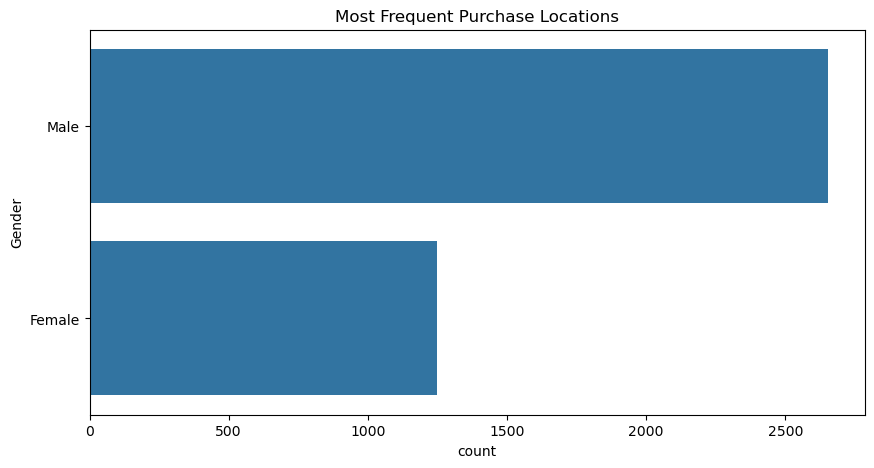

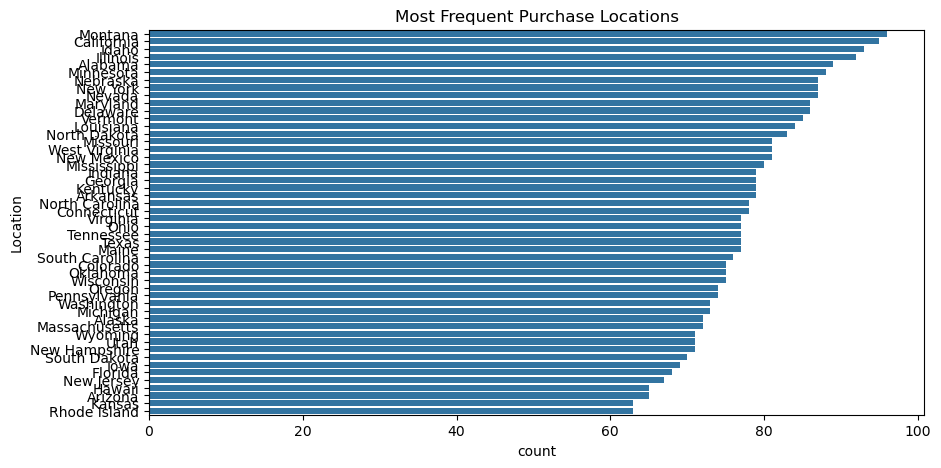

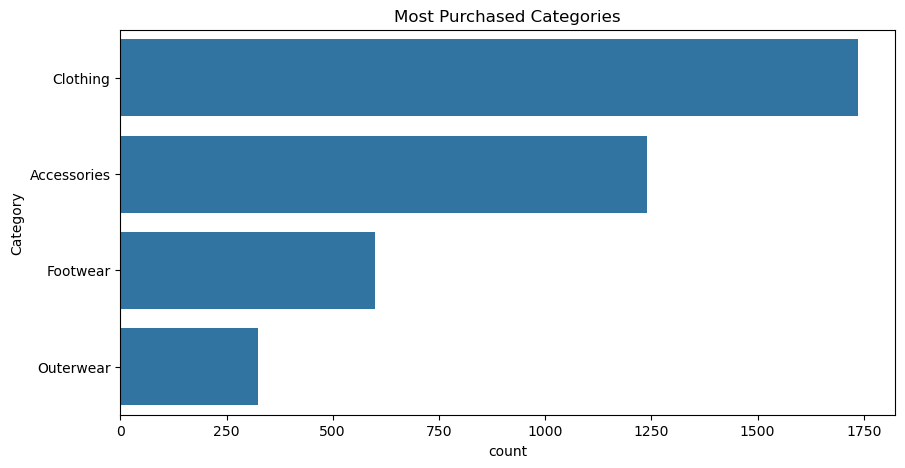

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(y=data["Gender"], order=data["Gender"].value_counts().index)
plt.title("Most Frequent Purchase Locations")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=data["Location"], order=data["Location"].value_counts().index)
plt.title("Most Frequent Purchase Locations")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=data["Category"], order=data["Category"].value_counts().index)
plt.title("Most Purchased Categories")
plt.show()

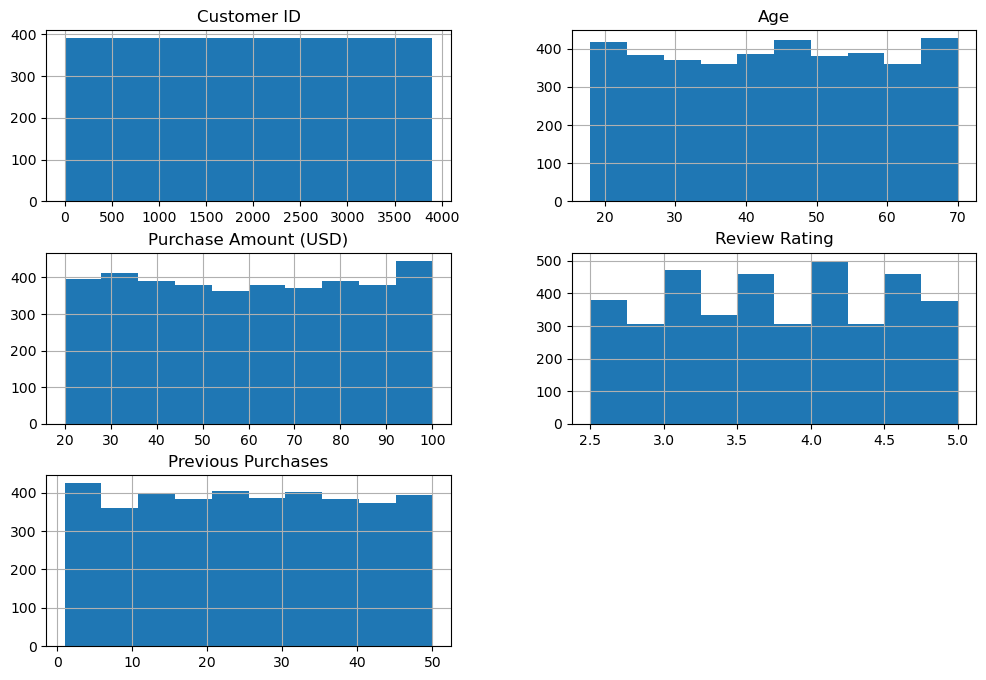

In [23]:
#Distribution in numerical columns
data.hist(figsize=(12, 8))
plt.show()

 **we need to create a list of categorical columns before applying **label encoding** to convert them into numerical values.**

In [25]:
cat= (data.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


## Step 4 **We need to encode the category features since we are going to perform some algorithms**

In [27]:
data_copy = data.copy()
LE=LabelEncoder()
for i in object_cols:
    data_copy[i]=data_copy[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [28]:
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

## Step 5 **Correlation Analysis**

In [30]:
# Drop the 'customer id' column
#data = data.drop('Customer ID', axis=1)
# Calculate the correlation matrix after dropping 'customer id'
corr_matrix = data_copy.corr()
# Print the correlation matrix
print(corr_matrix)

                          Customer ID       Age    Gender  Item Purchased  \
Customer ID                  1.000000 -0.004079 -0.807960        0.003648   
Age                         -0.004079  1.000000  0.002763       -0.000636   
Gender                      -0.807960  0.002763  1.000000        0.001921   
Item Purchased               0.003648 -0.000636  0.001921        1.000000   
Category                    -0.004133  0.003546 -0.004144        0.052951   
Purchase Amount (USD)        0.011048 -0.010424 -0.014044       -0.005342   
Location                    -0.013257 -0.001957  0.000747        0.020390   
Size                        -0.001801 -0.023654  0.018764       -0.008942   
Color                       -0.011144  0.006700 -0.000560        0.027241   
Season                      -0.018027 -0.028418  0.016258        0.012755   
Review Rating                0.001343 -0.021949  0.008164       -0.004621   
Subscription Status         -0.768960  0.006492  0.417197        0.003028   

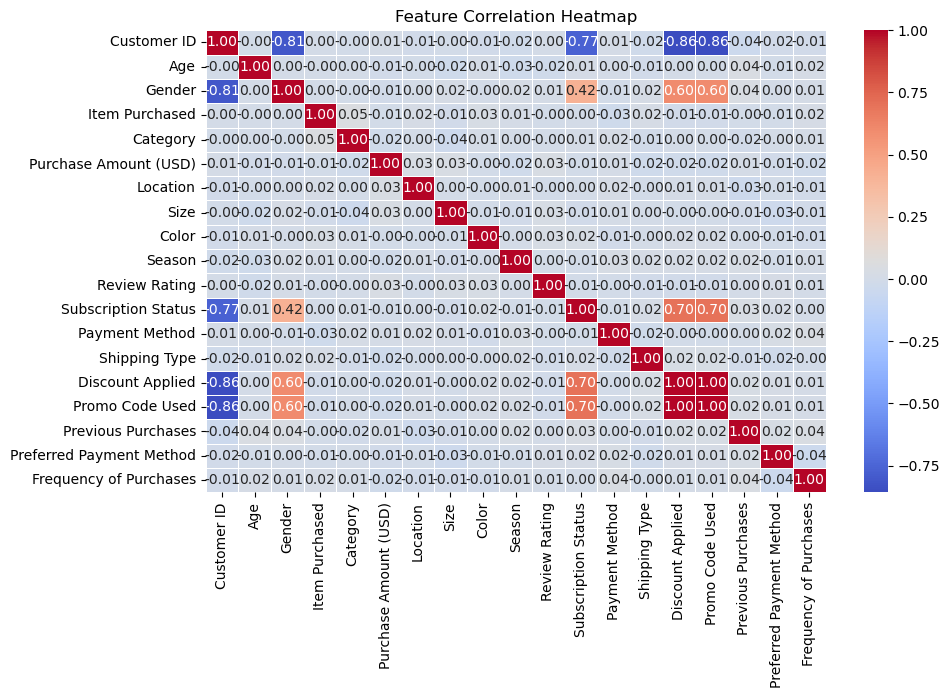

In [31]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 6 **Features Scaling**

**Before we move forward with the clustering, we need to scale our features.**

In [33]:
# Initialize the StandardScaler
customer_data_scaled = data_copy.copy()
columns_to_exclude = ['CustomerID'] 

columns_to_scale = data_copy.columns.difference(columns_to_exclude)

# Initialize and apply the scaler
scaler = StandardScaler()
customer_data_scaled[columns_to_scale] = scaler.fit_transform(data_copy[columns_to_scale])

# Display the first few rows
print(customer_data_scaled.head())

   Customer ID       Age    Gender  Item Purchased  Category  \
0    -1.731607  0.718913  0.685994       -1.394144 -0.002002   
1    -1.730719 -1.648629  0.685994        1.523236 -0.002002   
2    -1.729830  0.390088  0.685994       -0.143839 -0.002002   
3    -1.728942 -1.517099  0.685994        0.272930  1.113356   
4    -1.728054  0.061263  0.685994       -1.394144 -0.002002   

   Purchase Amount (USD)  Location      Size     Color    Season  \
0              -0.285629 -0.576399 -1.203814 -0.707620  1.349198   
1               0.178852 -0.436944 -1.203814 -0.015163  1.349198   
2               0.558882 -0.297488  0.945854 -0.015163 -0.441163   
3               1.276716  0.957614 -0.128980 -0.015163 -0.441163   
4              -0.454531  0.818159 -0.128980  1.231259 -0.441163   

   Review Rating  Subscription Status  Payment Method  Shipping Type  \
0      -0.907584             1.644294       -0.295206      -0.892178   
1      -0.907584             1.644294       -1.472409      -0.

## Step 7 **K-Means Clustering**

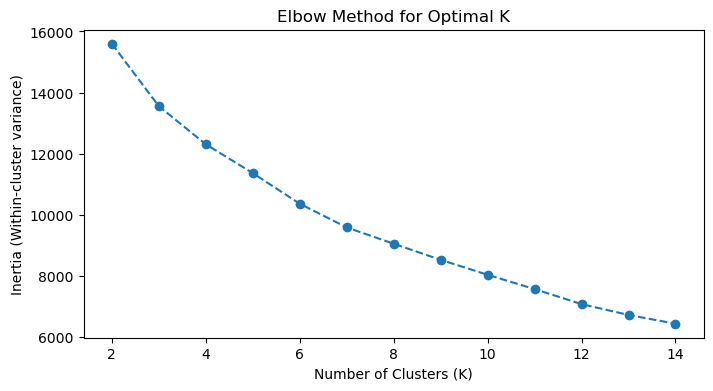

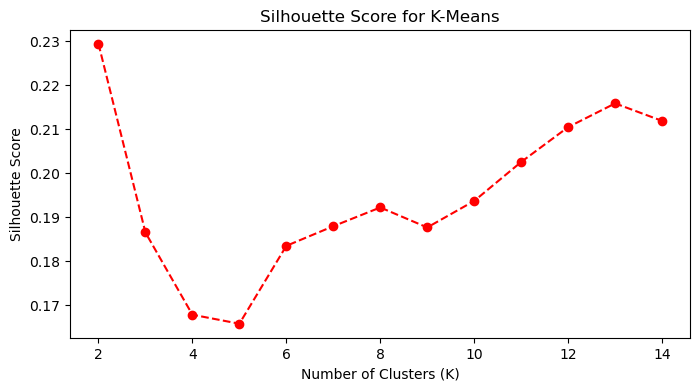

In [35]:
# optimal K using Elbow Method and Silhouette Scores
X5= customer_data_scaled.loc[:, ['Age', 'Gender', 'Frequency of Purchases', 'Item Purchased', 'Purchase Amount (USD)']].values

inertia = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X5)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X5, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster variance)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Means")
plt.show()

In [36]:
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print(f"Optimal K: {optimal_k} with Silhouette Score: {best_score:.4f}")

Optimal K: 2 with Silhouette Score: 0.2293


In [37]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(customer_data_scaled)  # Fit the model on your scaled data

# Get the cluster labels (which cluster each sample belongs to)
cluster_labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

In [38]:
print(centroids)

[[-9.87268993e-01  5.02708699e-03  6.85994341e-01 -1.60991472e-02
   6.58440496e-04 -2.04915937e-02  1.37306179e-02 -2.07660227e-03
   2.23295683e-02  1.79036094e-02 -1.43752663e-02  8.06170407e-01
  -2.48497111e-03  2.40365792e-02  1.15133896e+00  1.15133896e+00
   2.70991751e-02  1.65300056e-02  1.16795585e-02]
 [ 7.44781872e-01 -3.79236387e-03 -5.17504503e-01  1.21449707e-02
  -4.96718269e-04  1.54585707e-02 -1.03581855e-02  1.56655960e-03
  -1.68451129e-02 -1.35062317e-02  1.08444992e-02 -6.08163641e-01
   1.87462733e-03 -1.81328580e-02 -8.68553950e-01 -8.68553950e-01
  -2.04432374e-02 -1.24700042e-02 -8.81089502e-03]]


In [39]:
customer_data_scaled['Cluster'] = cluster_labels

In [40]:
customer_data_scaled.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,-1.731607,0.718913,0.685994,-1.394144,-0.002002,-0.285629,-0.576399,-1.203814,-0.707620,1.349198,-0.907584,1.644294,-0.295206,-0.892178,1.151339,1.151339,-0.785831,1.471636,0.012575,0
1,-1.730719,-1.648629,0.685994,1.523236,-0.002002,0.178852,-0.436944,-1.203814,-0.015163,1.349198,-0.907584,1.644294,-1.472409,-0.892178,1.151339,1.151339,-1.616552,-0.894631,0.012575,0
2,-1.729830,0.390088,0.685994,-0.143839,-0.002002,0.558882,-0.297488,0.945854,-0.015163,-0.441163,-0.907584,1.644294,-0.883807,-0.303032,1.151339,1.151339,-0.162789,-0.303064,1.513849,0
3,-1.728942,-1.517099,0.685994,0.272930,1.113356,1.276716,0.957614,-0.128980,-0.015163,-0.441163,-0.349027,1.644294,0.881996,0.286113,1.151339,1.151339,1.637107,0.880069,1.513849,0
4,-1.728054,0.061263,0.685994,-1.394144,-0.002002,-0.454531,0.818159,-0.128980,1.231259,-0.441163,-1.466141,1.644294,-0.883807,-0.303032,1.151339,1.151339,0.391025,0.880069,-1.488699,0


In [41]:
data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

## **Gower Distance** 

In [43]:
# Select relevant columns
columns_needed = ['Age', 'Gender', 'Frequency of Purchases', 'Item Purchased', 'Purchase Amount (USD)']
df = data[columns_needed]

cat = list(df.select_dtypes(include=['object']).columns)

raw_data_for_gower = df[cat + ['Age', 'Purchase Amount (USD)']]

for col in cat:
    raw_data_for_gower[col] = raw_data_for_gower[col].astype(str)

gower_matrix = gower.gower_matrix(raw_data_for_gower)

print(gower_matrix[:10, :10]) 

[[0.         0.36596155 0.46923077 0.62326926 0.24846154 0.5171154
  0.51076925 0.5551923  0.62153846 0.46269232]
 [0.36596155 0.         0.54173076 0.4726923  0.5375     0.6138462
  0.62173074 0.50576925 0.5094231  0.6286538 ]
 [0.46923077 0.54173076 0.         0.35403848 0.47923076 0.34788463
  0.48       0.38596153 0.55230767 0.53192306]
 [0.62326926 0.4726923  0.35403848 0.         0.5948077  0.47115386
  0.57403845 0.36307693 0.43673077 0.68596154]
 [0.24846154 0.5375     0.47923076 0.5948077  0.         0.47634616
  0.55923074 0.5067308  0.39307693 0.49115384]
 [0.5171154  0.6138462  0.34788463 0.47115386 0.47634616 0.
  0.6278846  0.30807692 0.6694231  0.46980768]
 [0.51076925 0.62173074 0.48       0.57403845 0.55923074 0.6278846
  0.         0.66596156 0.5723077  0.35807693]
 [0.5551923  0.50576925 0.38596153 0.36307693 0.5067308  0.30807692
  0.66596156 0.         0.5613462  0.5228846 ]
 [0.62153846 0.5094231  0.55230767 0.43673077 0.39307693 0.6694231
  0.5723077  0.5613462  

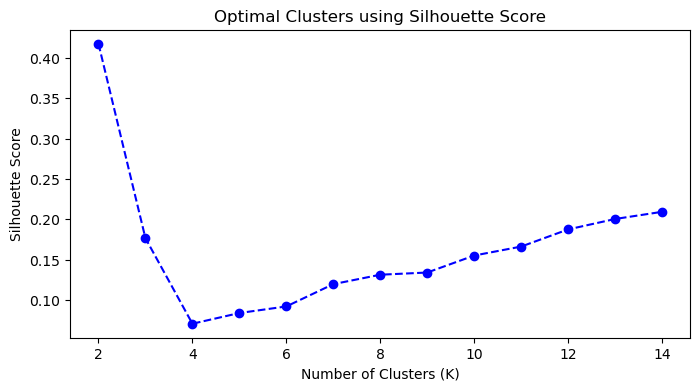

In [44]:
# Define range of clusters to test
K_range = range(2, 15) 
silhouette_scores = []

for k in K_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='complete')
    clusters = model.fit_predict(gower_matrix) 
    score = silhouette_score(gower_matrix, clusters) 
    silhouette_scores.append(score)
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Optimal Clusters using Silhouette Score")
plt.show()

In [45]:
print(max(silhouette_scores))

0.4174813


In [46]:
final_model = AgglomerativeClustering(n_clusters=2, linkage='complete')
raw_data_for_gower["Clusters"] = final_model.fit_predict(gower_matrix)

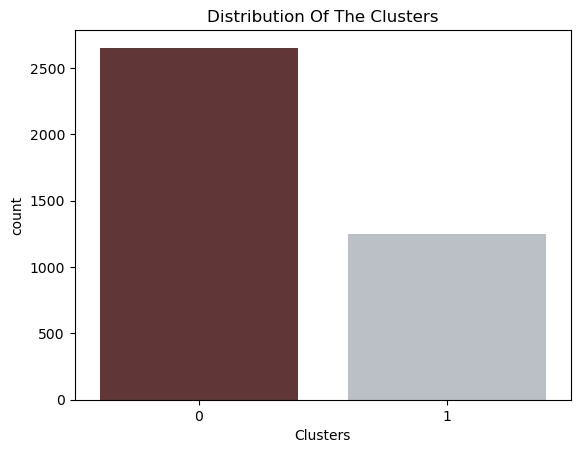

In [47]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=raw_data_for_gower["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

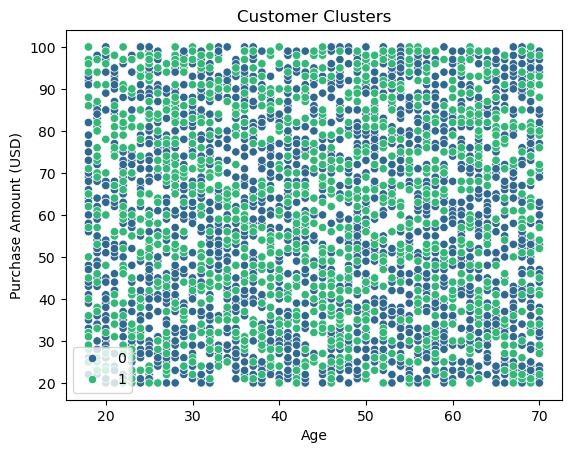

In [48]:
sns.scatterplot(data=raw_data_for_gower, x="Age", y="Purchase Amount (USD)", hue="Clusters", palette="viridis")
pl.set_title("Customer Clusters")
plt.legend()
plt.title("Customer Clusters")
plt.show()

 **Cluster Interpretation** 🚀  

- **Group 0**: 
  - **Average Age**: 43.97 years (Range: 18 - 70)  
  - **Average Purchase Amount**: $59.99 (Range: $20 - $100)  
  - **Customer Count**: 1,298  

- **Group 1**:
  - **Average Age**: 44.12 years (Range: 18 - 70)  
  - **Average Purchase Amount**: $59.65 (Range: $20 - $100)  
  - **Customer Count**: 2,602  

 **Insights**: Both groups spend similarly, but Group 1 is larger customer.

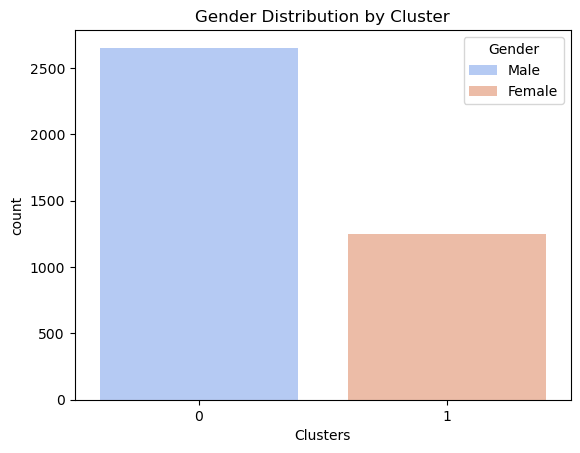

In [50]:
sns.countplot(data=raw_data_for_gower, x="Clusters", hue="Gender", palette="coolwarm")
plt.title("Gender Distribution by Cluster")
plt.show()

 Gender segmentation in purchasing behavior
 
- **Cluster 0 is mainly male,**  suggesting purchases of jeans, sweaters, and sneakers.
- **Cluster 1 is entirely female,** possibly indicating preferences for items like dresses, handbags, and blouses. 

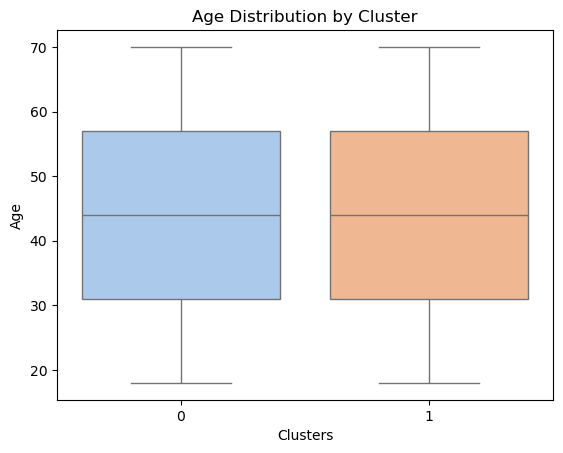

In [57]:
sns.boxplot(data=raw_data_for_gower, x="Clusters", y="Age", palette="pastel")
plt.title("Age Distribution by Cluster")
plt.show()

**Insights on Age Distribution by Cluster**
 
🔹 Both clusters have a similar **average age (44 years)** and **age distribution**.    
🔹 Both groups have a **balanced mix** of younger (18-30) and older (50-70) customers.  

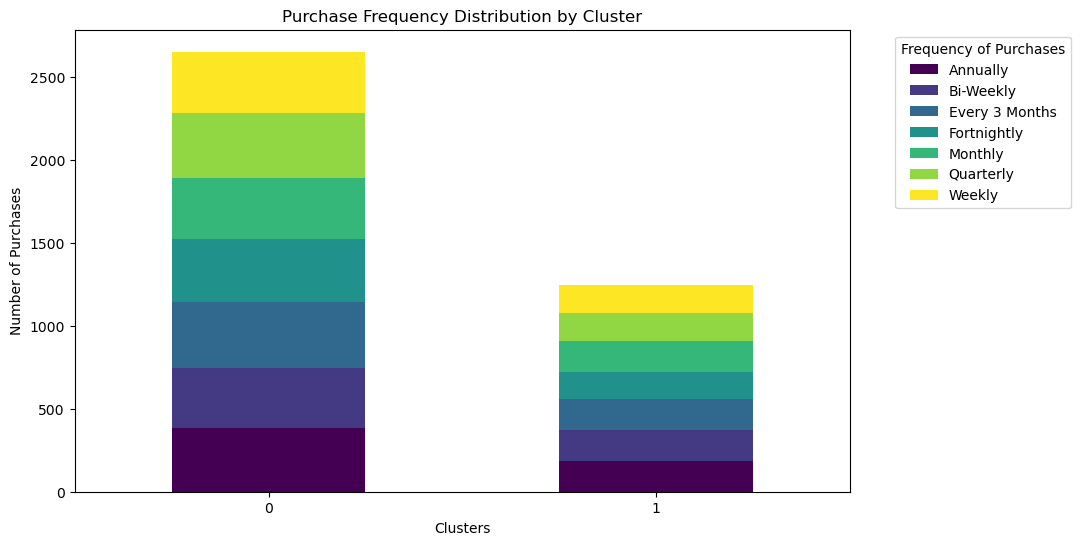

In [68]:
purchase_freq.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

plt.title("Purchase Frequency Distribution by Cluster")
plt.xlabel("Clusters")
plt.ylabel("Number of Purchases")
plt.legend(title="Frequency of Purchases", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)

plt.show()

In [66]:
purchase_freq = raw_data_for_gower.groupby(["Clusters", "Frequency of Purchases"]).size().unstack()
print(purchase_freq)

Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Clusters                                                                   
0                            387        359             398          379   
1                            185        188             186          163   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Clusters                                            
0                           368        394     367  
1                           185        169     172  


 Interpretation of Purchase Frequency by Cluster

- **Cluster 0**  
  - less frequent purchases.   

- **Cluster 1**
-  often frequent purchases.
  -  Indicates they are repeat customers with a habit of consistent buying.    

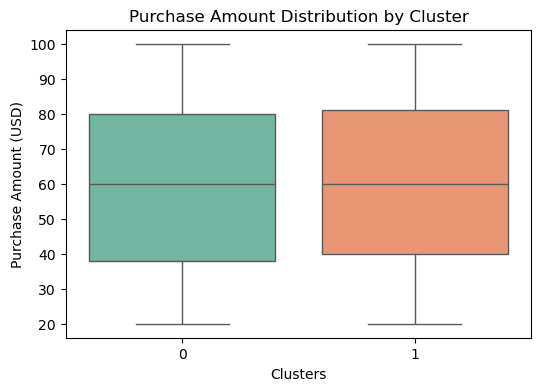

In [70]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=raw_data_for_gower, x="Clusters", y="Purchase Amount (USD)", palette="Set2")
plt.title("Purchase Amount Distribution by Cluster")
plt.show()

**Both clusters have similar average spending (~$60), meaning there isn’t a drastic difference in their purchase habits**

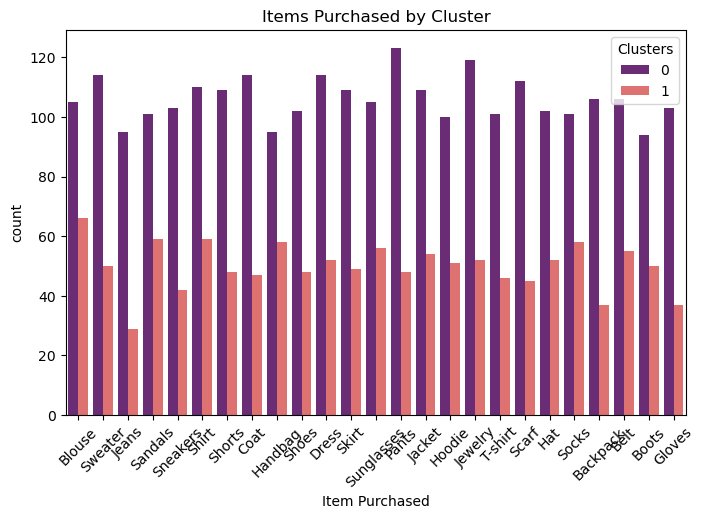

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(data=raw_data_for_gower, x="Item Purchased", hue="Clusters", palette="magma")
plt.title("Items Purchased by Cluster")
plt.xticks(rotation=45)
plt.show()

**Item Purchase Behavior by Cluster**

 **Cluster 0 (Frequent Shoppers & Repeat Buyers)**  
- Generally **buys more across all categories**, indicating **higher shopping activity**.  .  
- Likely **fashion-conscious, trend-driven**, or have a higher disposable income.  

 **Cluster 1 (Less Frequent Shoppers, Possibly Big-Ticket Buyers)**  
- Purchases **fewer items overall**, suggesting **less frequent but possibly higher-value purchases**.  
- More balanced distribution across **different clothing categories**.  
- May shop **seasonally or for necessity**, rather than frequent trend-driven purchases.  

  **Insights:**  
- **Cluster 0 dominates most categories**, meaning they are **loyal customers** who return often.  
- **Cluster 1 might be occasional shoppers**, focusing on essentials rather than a wide variety of fashion items.  
